# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: The aim of this project was to predict admission decision (admit or reject) for each student given a bunch of independent variables such as GPA, GRE, and prestige (school ranking). I built a binary classification model, using logistic regression techniques learned in class. The model assumed that the indepedent variables were not highly correlated.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: Dataset was admissions.csv.  There were some NaN, which I had to eliminate using dropna() function. Also, prestige [1,2,3,4] is actually a categorical variable, not numerical. So I had to create dummy variables [Prestige 1, Prestige 2, etc..].

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
# import pylab as pl
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

df_raw = pd.read_csv("./assets/admissions.csv")
df = df_raw.dropna()
print (df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [53]:
table = pd.DataFrame({'Not Admitted': [df['gpa'].groupby(df['admit']).mean()[0], df['gpa'].groupby(df['admit']).std()[0],
                                      df['gre'].groupby(df['admit']).mean()[0], df['gre'].groupby(df['admit']).std()[0],
                                       len(df[(df['prestige']==1) & (df['admit']==0)])/len(df[df['prestige']==1]),
                                       len(df[(df['prestige']==2) & (df['admit']==0)])/len(df[df['prestige']==2]),
                                       len(df[(df['prestige']==3) & (df['admit']==0)])/len(df[df['prestige']==3]),
                                       len(df[(df['prestige']==4) & (df['admit']==0)])/len(df[df['prestige']==4]),
                                      ],
                      'Admitted': [df['gpa'].groupby(df['admit']).mean()[1], df['gpa'].groupby(df['admit']).std()[1],
                                  df['gre'].groupby(df['admit']).mean()[1], df['gre'].groupby(df['admit']).std()[1],
                                       len(df[(df['prestige']==1) & (df['admit']==1)])/len(df[df['prestige']==1]),
                                       len(df[(df['prestige']==2) & (df['admit']==1)])/len(df[df['prestige']==2]),
                                       len(df[(df['prestige']==3) & (df['admit']==1)])/len(df[df['prestige']==3]),
                                       len(df[(df['prestige']==4) & (df['admit']==1)])/len(df[df['prestige']==4]),
                                  ]})
table.index = ['GPA_mean','GPA_std','GRE_mean','GRE_std','prestige 1','prestige 2','prestige 3','prestige 4']
table

,Admitted,Not Admitted
GPA_mean,3.489206,3.347159
GPA_std,0.371655,0.376355
GRE_mean,618.571429,573.579336
GRE_std,109.257233,116.052798
prestige 1,0.540984,0.459016
prestige 2,0.358108,0.641892
prestige 3,0.231405,0.768595
prestige 4,0.179104,0.820896


   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


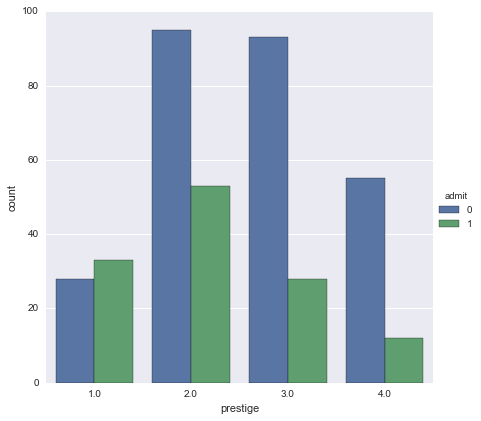

In [1]:
# better than a table, here's a visual plot:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
#import pylab as pl
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

df_raw = pd.read_csv("./assets/admissions.csv")
df = df_raw.dropna()
print (df.head())

sns.factorplot('prestige', data=df, hue='admit',kind='count',size=6)

In [54]:
pd.crosstab(df['prestige'],df['admit'])

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


### Methods: Write up the methods used in your analysis

Answer: We used StatsModel GLM (Generalized Linear Model) function to train and fit the data. We then use the model to predict admission.  We then used Cartesian function to iterate and try various input combos.  We created a new dataframe that looked the same as the original (same columns) and then used statsmodel logit function to make predictions on the enumerated dataset

### Results: Write up your results

Answer: All independent variables in this case (as well as the added constant) were significant.  We see that the higher to GPA and GRE scores, the more likely it is to be admitted. Also, the higher the prestige rank, the better the oddes are of being admitted.

### Discussion: Write up your discussion and future steps

Answer: Model performance should be compared to the baseline naive classifier, where we predict whichever is the most common outcome (in this case, reject).  The model should beat the naive classifier.  We can also use other criterion to select the best model (such as AIC, BIC etc).

We could also try to build a new prediction model using a different method altogether, such as tree or random forest - and then evaluate the performance by looking at AUC.